In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scikit_learn as sk
import tensorflow as tf

#weather_data = pd.read_csv(r'D:/CSU/Winter 2021/CSC510 - Foundations of Artificial Intelligence/Portfolio Project/Data/simplemaps_uszips_basicv1.79/climate_data_for_US/combined_climate_data_1980_2021.csv')

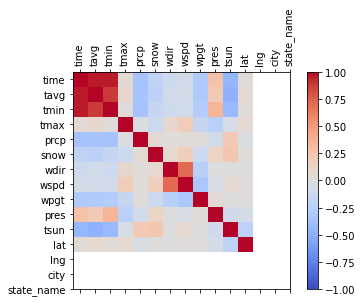

In [ ]:
'''find correlation between variables. Our target variable is tavg
    .corr() is the function that will produce a correlation table 
    then we can plot this out in matplotlib. The dark red means positive strong correlation
    and the dark blue mean negative strong correlation. The diagonal line only means the intersection
    of an attribute with itself.
'''
corr = weather_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(weather_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(weather_data.columns)
ax.set_yticklabels(weather_data.columns)
plt.show()



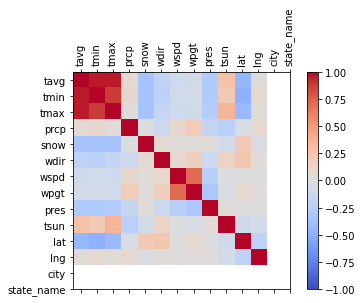

In [3]:
# next we need to prepare data for an ANN to take it in and do its magic. 

In [4]:
'''clean and prepare data'''
#weather_data

''' we need to first only get the columns that are correlated to our target variable (tavg).
These variables will be tavg, tmin, tmax, prcp, wdir, wspd,wpgt, pres, tsun'''

weather_data_num_variables = weather_data[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun']]
weather_data_num_variables

,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,
2006-01-01,-0.4,-1.0,0.0,NaN,66.0,17.9,NaN,NaN,NaN
2006-01-02,-1.2,-1.0,0.0,NaN,NaN,14.0,NaN,NaN,NaN
2006-01-03,-0.1,-1.0,2.0,NaN,144.3,16.3,NaN,NaN,NaN
2006-01-04,2.1,1.0,5.0,NaN,296.7,25.1,NaN,NaN,NaN
2006-01-05,-1.8,-1.0,1.0,NaN,NaN,17.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-27,27.5,26.1,30.0,0.0,59.6,22.0,NaN,1013.0,NaN
2021-12-28,27.2,25.0,30.0,0.0,49.6,24.5,NaN,1013.5,NaN
2021-12-29,27.8,25.6,30.6,0.3,68.8,26.6,NaN,1013.2,NaN


In [5]:
'''next we'll need to replace all NaN values with the average value in that column. There are several methods I might
try here but this is the first and we'll evaluate the result. Another idea I want to try is to omit all rows that 
have NaN values and use that dataset to predict then use those values to replace NaN values in the original dataset'''

# find where there are nulls
weather_data_num_variables.tavg.isna().sum()



3659209

In [6]:
# find the mean for each column and replace the NaN's using the fillna() method
# then check the results using the isna() and sum() methods

for column in weather_data_num_variables.columns:
    weather_data_num_variables[column] = weather_data_num_variables[column].fillna(round(weather_data_num_variables[column].mean(), 2))

weather_data_num_variables.isna().sum()

C:\Users\danny\AppData\Local\Temp/ipykernel_23324/943630123.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_num_variables[column] = weather_data_num_variables[column].fillna(round(weather_data_num_variables[column].mean(), 2))


tavg    0
tmin    0
tmax    0
prcp    0
wdir    0
wspd    0
wpgt    0
pres    0
tsun    0
dtype: int64

In [7]:
# check for outliers
weather_data_num_variables.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
tavg,22392724.0,13.422551,9.755067,-59.0,7.50,13.42,20.90,48.8
tmin,22392724.0,9.065861,9.579630,-61.1,1.10,10.00,16.10,47.0
tmax,22392724.0,17.648910,11.366932,-97.0,9.00,17.65,27.20,94.0
prcp,22392724.0,2.537287,7.297453,0.0,0.00,0.30,2.54,4790.4
wdir,22392724.0,190.899577,60.326792,0.0,190.90,190.90,190.90,360.0
wspd,22392724.0,12.362140,5.844798,0.0,8.60,12.36,14.90,160.9
wpgt,22392724.0,37.600377,6.230176,0.0,37.60,37.60,37.60,475.2
pres,22392724.0,1016.717636,5.681073,905.7,1014.70,1016.72,1018.50,1065.3
tsun,22392724.0,376.760661,129.557027,0.0,376.76,376.76,376.76,1422.0


In [8]:
'''
    the wind speed column is in degrees. For models to make use of the wspd columns, we'll need to convert it to a vector 
'''

wv = weather_data_num_variables.pop('wspd')

# Convert to radians.
wd_rad = weather_data_num_variables.pop('wdir')*np.pi / 180

# Calculate the wind x and y components.
weather_data_num_variables['Wdirx'] = wv*np.cos(wd_rad)
weather_data_num_variables['Wdiry'] = wv*np.sin(wd_rad)



C:\Users\danny\AppData\Local\Temp/ipykernel_23324/925395456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_num_variables['Wdirx'] = wv*np.cos(wd_rad)
C:\Users\danny\AppData\Local\Temp/ipykernel_23324/925395456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_num_variables['Wdiry'] = wv*np.sin(wd_rad)


In [9]:
weather_data_num_variables

,tavg,tmin,tmax,prcp,wpgt,pres,tsun,Wdirx,Wdiry
time,,,,,,,,,
2006-01-01,-0.4,-1.0,0.0,2.54,37.6,1016.72,376.76,7.280586,16.352464
2006-01-02,-1.2,-1.0,0.0,2.54,37.6,1016.72,376.76,-13.747422,-2.647336
2006-01-03,-0.1,-1.0,2.0,2.54,37.6,1016.72,376.76,-13.236961,9.511722
2006-01-04,2.1,1.0,5.0,2.54,37.6,1016.72,376.76,11.277907,-22.423622
2006-01-05,-1.8,-1.0,1.0,2.54,37.6,1016.72,376.76,-17.282473,-3.328080
...,...,...,...,...,...,...,...,...,...
2021-12-27,27.5,26.1,30.0,0.00,37.6,1013.00,376.76,11.132743,18.975301
2021-12-28,27.2,25.0,30.0,0.00,37.6,1013.50,376.76,15.878938,18.657689
2021-12-29,27.8,25.6,30.6,0.30,37.6,1013.20,376.76,9.619214,24.799813


### Split data

In [30]:
''' Now we can split data. Then we'll want to normalize it. We're going to use a pretty 
standard set split which is 70% train, 20% validate, 10% test'''

column_indices = {name: i for i, name in enumerate(weather_data_num_variables.columns)}

n = len(weather_data_num_variables)
train_df = weather_data_num_variables[0:int(n*0.7)]
val_df = weather_data_num_variables[int(n*0.7):int(n*0.9)]
test_df = weather_data_num_variables[int(n*0.9):]

num_features = weather_data_num_variables.shape[1]



### Normalize the data

In [31]:
''' for the test set we will scale the data. I'll be using Normalization to do this.
    Basically, normalization meaning take a value and subtract the mean and divide by the standard deviation. '''
    
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


## Windowing. Create a class for windows. Tensorflow documentation and other documentation is very helpful making sense of windowing

#### We need to create windows that take input and label data. If we'r predicting a day in the future, we can used windows to use 5 days worth of data, etc.

In [52]:
'''
We will make use of creating a class WindowGenerator that will take in labels and width for the train, 
validate and test sets. This makes our sets reusable and is good practice when working with Deep Learning models
such as RNN
'''

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

  '''The split_window function will split our data into inputs and labels'''
  def split_window(self, features):
    inputs = features[:, self.input_slice]
    labels = features[:, self.labels_slice]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, self.column_indices[name]] for name in self.label_columns], 
            axis = -1
            )

    # # set the shape manually since slicing doesn't save the shape
    # inputs.set_shape([None, self.input_width, None])
    # labels.set_shape([None, self.label_width, None])

    return inputs, labels


In [34]:
'''
The below instance creates a learning input of 50 days to predict the average temperature (tavg)
 of one day. The label_width represents that a label is 1 day. We can (and will) add more columns to the
 label_colums argument
'''
w1 = WindowGenerator(input_width=50,label_width=1,shift=1, label_columns=['tavg'])

w1

Total window size: 51
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Label indices: [50]
Label column name(s): ['tavg']

In [37]:
train_df['tavg']

time
2006-01-01   -1.389186
2006-01-02   -1.472005
2006-01-03   -1.358129
2006-01-04   -1.130376
2006-01-05   -1.534119
                ...   
2016-02-08    0.111910
2016-02-09    0.422482
2016-02-10    0.194729
2016-02-11    0.122262
2016-02-12    0.453539
Name: tavg, Length: 15674906, dtype: float64

In [53]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['tavg'])
w2


Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['tavg']

In [58]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 9)
Inputs shape: (3, 6, 9)
Labels shape: (3, 9, 1)


### Create tf.data.Datasets for standard reuse of datasets in different models

In [59]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset


In [61]:
# Create attributes within window generator to access the train, validate, and test datasets  

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example


# Create the model

### We will be using a LSTM recurrent neural network

In [ ]:
# next we need to prepare data for an ANN to take it in and do its magic. 


'''Create the model using tf.keras.Sequential. This model will have two layers using the
relu activation function. This is a bit overkill but is used to demostrate how this could be 
done on another dataset such as one that tensorflow provides called fashion-mnist.'''

input_size = 2
hidden_layer_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                            kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                            bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                        )
])

'''Create a custom optimizer that takes advantage of tensorflow's
    pre built optimizers. Here we're using Stochastic Gradient Descent.'''

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

'''Outline the model. Since this is a regression problem and NOT a classification problem, we
will only consider looking at the loss.'''

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

'''fit the model and run'''

model.fit(inputs, targets, epochs=100, verbose=2)

In [ ]:
'''Extract the Weights and Bias'''
print('Get the weights and bias')
model.layers[0].get_weights()


print('Weights')
weights = model.layers[0].get_weights()[0]
weights


print('Bias')
bias = model.layers[0].get_weights()[1]
bias


'''********************PREDICTION********************'''

print('''********************PREDICTION********************''')
print('Inputs')
model.predict_on_batch(inputs).round(1)


print('''********************PREDICTION********************''')
print('Targets')
targets.round(1)


test_loss = model.evaluate(inputs, targets)

print('\n\nFinal Model Loss')
print('\nTest loss: {0:.2f}.'.format(test_loss, test_accuracy*100))